

# **Variational Autoencoder (VAE) for image denoising and generation**


## **Autoencoders**

![Autoencoder](ae.png)

### **Components**

1. **Encoder**: Mapping from Input space to lower dimension space

2. **Latent representation**: A transformed representation from the input's dimension space to the latent dimension space

2. **Decoder**: Reconstructing from lower dimension space to Output space

## **Autoencoders's applications**
1. Dimensionality Reduction
2. Feature Extraction
3. *Image Denoising*
4. Image Compression
5. Image Search
6. Anomaly Detection
7. Missing Value Imputation
8. *Synthetic data generation*

## **Convolutional Autoencoders**
![Convolutional Autoencoder](cae.svg)




> *Loss  = loss_function(input,output)*






## **Variational Convolutional Autoencoders**

Variational Autoencoders (VAEs) can be regarded as enhanced Autoencoders where a Bayesian approach is used to learn the probability distribution of the input data.


![VAE](vae.png)



> *Loss  = loss_function(input,output) + KL_divergence*


## **Project Outline**

1. Insert Gaussian noise (mean=0) to *Fashion Mnist* dataset (60000 gray scale 28 x 28 images )

2. Train a VAE for denoising the images (Loss = loss_function(original_images, output))

3. Use the output of the denoising autoencoder for training a generative VAE with the same architecture

4. Evaluate the quality of denoising for different latent space dimensions

5. Evaluate the quality of the generative model for different latent space dimensions

### **Constant parameters**

- Training epochs = 20

- Batch size = 18

- Learning rate = 0.001

- Loss function = MSE

- VAE architecture


### **Variable parameters**

- Latent space dimensions (for denoising model) = 10, 100, 250

- Latent space dimensions (for generative model) = 2, 10, 100, 250

> **NOTE** : All the generative model variants were trained with the output of the denoising model trained with 10 latent dimensions. 





# **Visualization of results**

In [17]:
from Plot import *
from VAE import *
from FashionDataloader import *
import torch

### 1.  **Denoising VAE with 10 latent space dimensions**

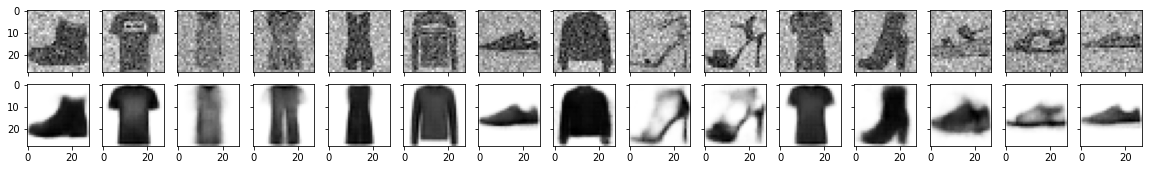

In [18]:
FILE = 'DAE.pth'
model = VAE(latent_dim=10, dim1=28, dim2=28)
model.load_state_dict(torch.load(FILE))
model.eval()

DATALOADER = get_FashionMNIST_dataloaders(18)[0]
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
UNNORMALIZER = None
NUM_IMAGES = 10
FIG_SIZE = (20, 2.5)
MODEL_TYPE = 'VAE'

plot_generated_images(data_loader=DATALOADER, model=MODEL, device=DEVICE, modeltype='VAE')

### 2.  **Denoising VAE with 100 latent space dimensions**

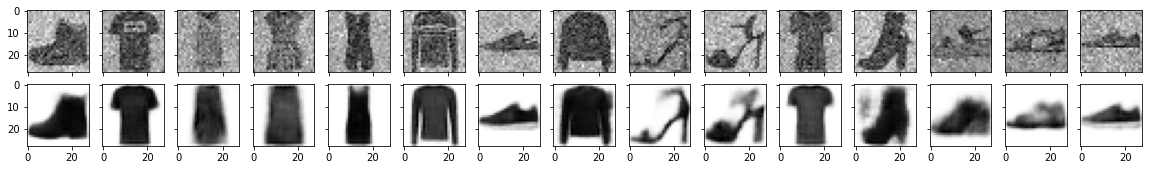

In [19]:
FILE = 'DAE_20e_100lat.pth'
model = VAE(latent_dim=100, dim1=28, dim2=28)
model.load_state_dict(torch.load(FILE))
model.eval()

DATALOADER = get_FashionMNIST_dataloaders(18)[0]
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
UNNORMALIZER = None
NUM_IMAGES = 10
FIG_SIZE = (20, 2.5)
MODEL_TYPE = 'VAE'

plot_generated_images(data_loader=DATALOADER, model=MODEL, device=DEVICE, modeltype='VAE')


### 3.  **Denoising VAE with 250 latent space dimensions**

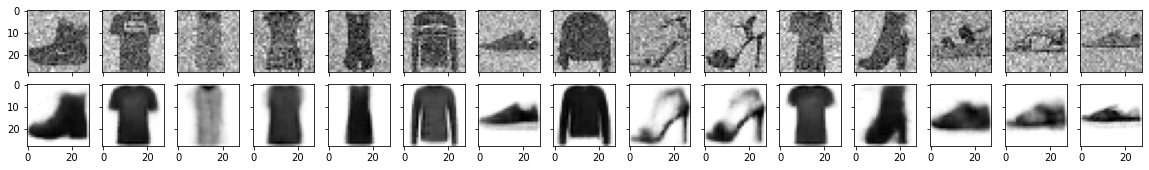

In [20]:
FILE = 'DAE_20e_250lat.pth'
model = VAE(latent_dim=250, dim1=28, dim2=28)
model.load_state_dict(torch.load(FILE))
model.eval()

DATALOADER = get_FashionMNIST_dataloaders(18)[0]
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
UNNORMALIZER = None
NUM_IMAGES = 10
FIG_SIZE = (20, 2.5)
MODEL_TYPE = 'VAE'

plot_generated_images(data_loader=DATALOADER, model=MODEL, device=DEVICE, modeltype='VAE')


### 4.  **Generative VAE Autoencoder with 2 latent space dimensions**

In [21]:
FILE = 'GAE_20e_2lat.pth'
model = VAE(latent_dim=2, dim1=28, dim2=28)
model.load_state_dict(torch.load(FILE))
model.eval()


VAE(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Flatten(start_dim=1, end_dim=-1)
  )
  (final_linear): Linear(in_features=3136, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=3136, bias=True)
    (1): Reshape()
    (2): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
    (5): LeakyReLU(negative_slope=0.01)
    (6): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2))
    (7): LeakyReLU(negative_sl

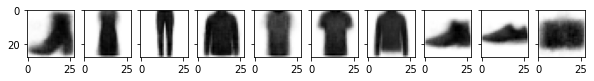

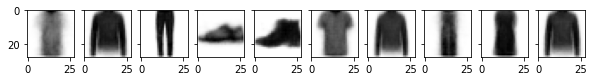

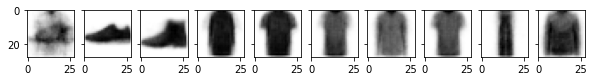

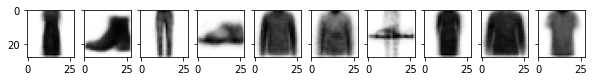

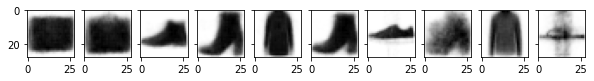

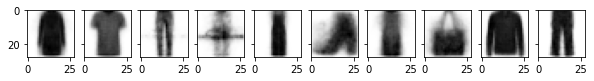

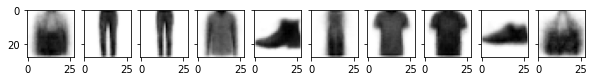

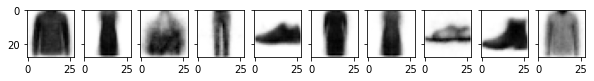

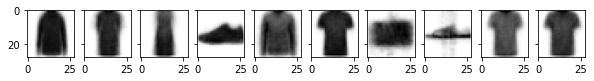

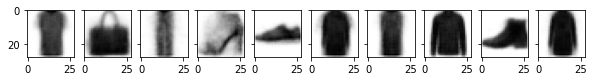

In [22]:
#plot_images_sampled_from_vae
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LATENT_SIZE = 2
UNNORMALIZER = None
NUM_IMAGES = 10

for i in range(10):
    plot_images_sampled_from_vae(model=model, device=DEVICE, latent_size=LATENT_SIZE)
    plt.show()

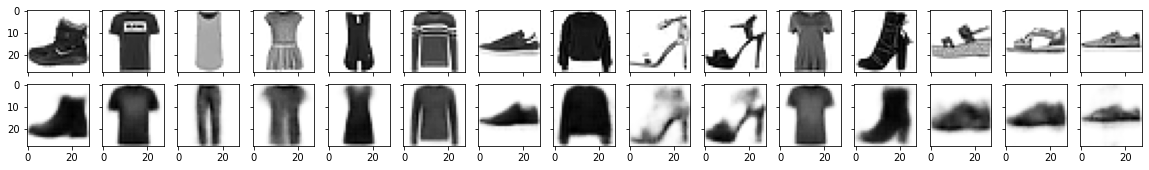

In [23]:
#plot_generated_images
DATALOADER = get_FashionMNIST_dataloaders(18)[0]
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
UNNORMALIZER = None
NUM_IMAGES = 10
FIG_SIZE = (20, 2.5)
MODEL_TYPE = 'GAE'

plot_generated_images(data_loader=DATALOADER, model=MODEL, device=DEVICE, modeltype=MODEL_TYPE)

### 5.  **Generative VAE Autoencoder with 10 latent space dimensions**

In [24]:
FILE = 'GAE_20e_10lat.pth'
model = VAE(latent_dim=10, dim1=28, dim2=28)
model.load_state_dict(torch.load(FILE))
model.eval()



VAE(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Flatten(start_dim=1, end_dim=-1)
  )
  (final_linear): Linear(in_features=3136, out_features=10, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=3136, bias=True)
    (1): Reshape()
    (2): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
    (5): LeakyReLU(negative_slope=0.01)
    (6): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2))
    (7): LeakyReLU(negative_

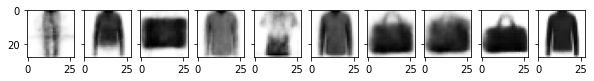

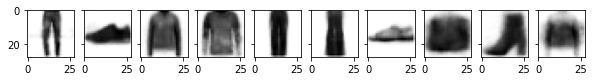

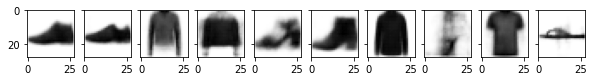

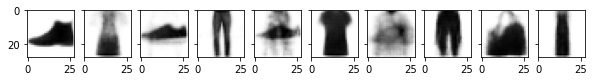

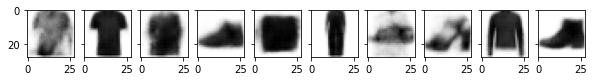

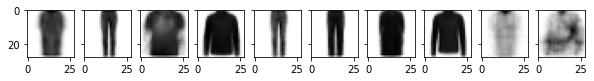

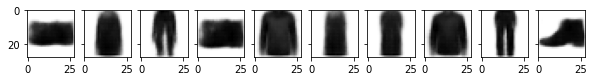

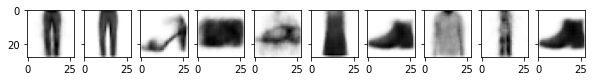

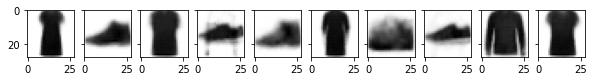

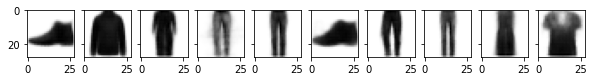

In [25]:
#plot_images_sampled_from_vae
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LATENT_SIZE = 10
UNNORMALIZER = None
NUM_IMAGES = 10

for i in range(10):
    plot_images_sampled_from_vae(model=model, device=DEVICE, latent_size=LATENT_SIZE)
    plt.show()

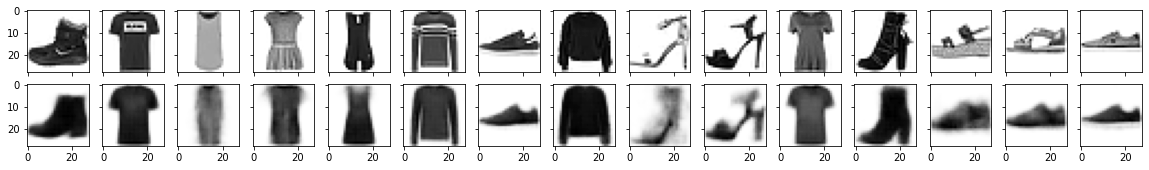

In [26]:
#plot_generated_images
DATALOADER = get_FashionMNIST_dataloaders(18)[0]
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
UNNORMALIZER = None
NUM_IMAGES = 10
FIG_SIZE = (20, 2.5)
MODEL_TYPE = 'GAE'

plot_generated_images(data_loader=DATALOADER, model=MODEL, device=DEVICE, modeltype=MODEL_TYPE)

### 6.  **Generative VAE Autoencoder with 100 latent space dimensions**

In [27]:
FILE = 'GAE_20e_100lat.pth'
model = VAE(latent_dim=100, dim1=28, dim2=28)
model.load_state_dict(torch.load(FILE))
model.eval()

VAE(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Flatten(start_dim=1, end_dim=-1)
  )
  (final_linear): Linear(in_features=3136, out_features=100, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=100, out_features=3136, bias=True)
    (1): Reshape()
    (2): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
    (5): LeakyReLU(negative_slope=0.01)
    (6): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2))
    (7): LeakyReLU(negativ

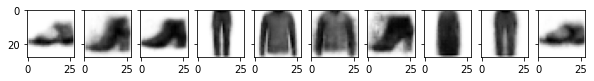

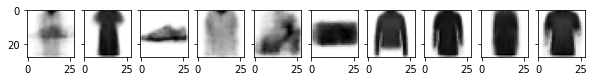

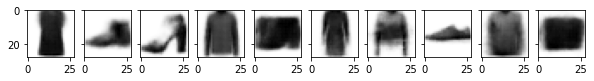

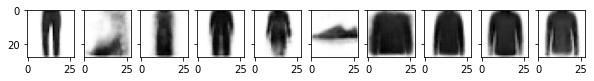

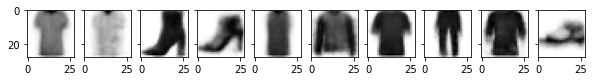

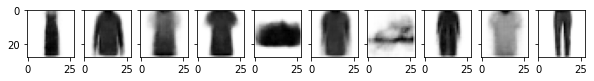

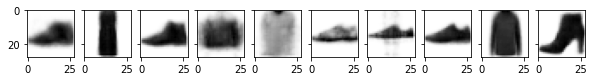

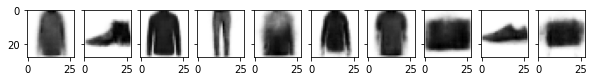

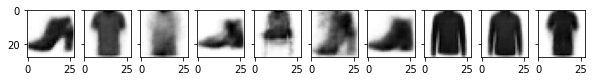

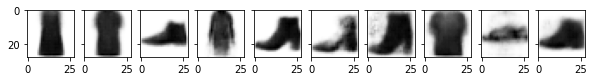

In [28]:
#plot_images_sampled_from_vae
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LATENT_SIZE = 100
UNNORMALIZER = None
NUM_IMAGES = 10

for i in range(10):
    plot_images_sampled_from_vae(model=model, device=DEVICE, latent_size=LATENT_SIZE)
    plt.show()

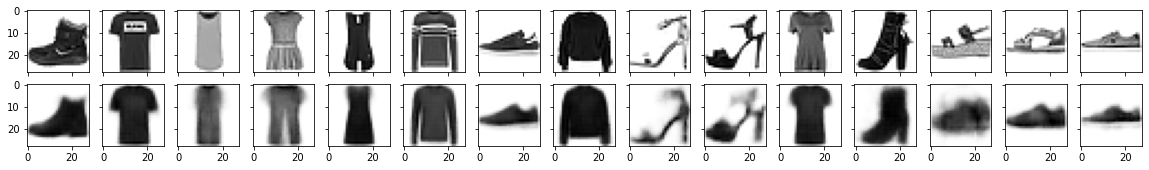

In [29]:
#plot_generated_images
DATALOADER = get_FashionMNIST_dataloaders(18)[0]
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
UNNORMALIZER = None
NUM_IMAGES = 10
FIG_SIZE = (20, 2.5)
MODEL_TYPE = 'GAE'

plot_generated_images(data_loader=DATALOADER, model=MODEL, device=DEVICE, modeltype=MODEL_TYPE)

### 7.  **Generative VAE Autoencoder with 250 latent space dimensions**

In [30]:
FILE = 'GAE_20e_250lat.pth'
model = VAE(latent_dim=250, dim1=28, dim2=28)
model.load_state_dict(torch.load(FILE))
model.eval()

VAE(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Flatten(start_dim=1, end_dim=-1)
  )
  (final_linear): Linear(in_features=3136, out_features=250, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=250, out_features=3136, bias=True)
    (1): Reshape()
    (2): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
    (5): LeakyReLU(negative_slope=0.01)
    (6): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2))
    (7): LeakyReLU(negativ

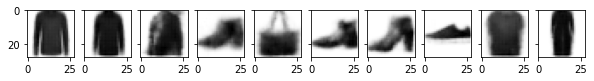

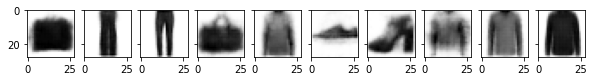

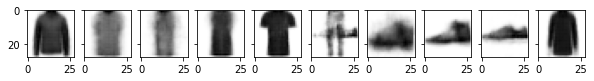

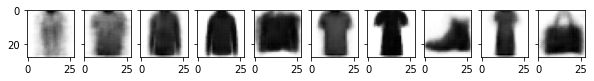

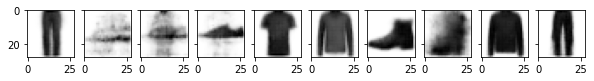

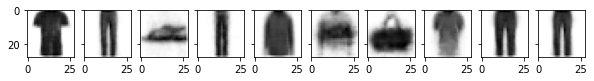

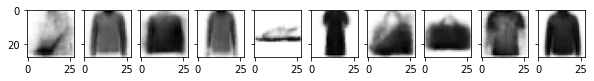

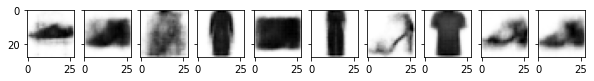

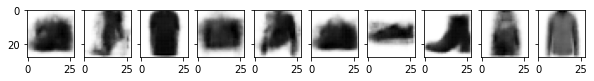

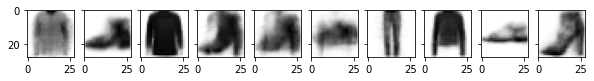

In [31]:
#plot_images_sampled_from_vae
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LATENT_SIZE = 250
UNNORMALIZER = None
NUM_IMAGES = 10

for i in range(10):
    plot_images_sampled_from_vae(model=model, device=DEVICE, latent_size=LATENT_SIZE)
    plt.show()

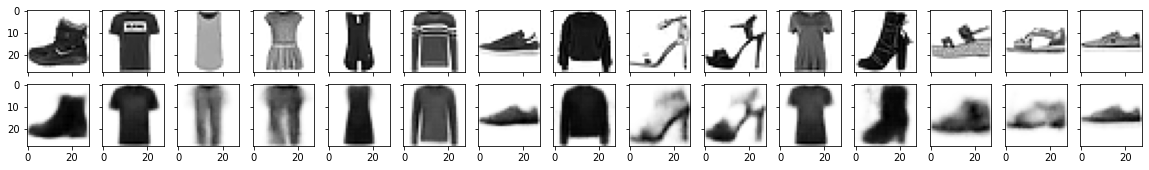

In [32]:
#plot_generated_images
DATALOADER = get_FashionMNIST_dataloaders(18)[0]
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
UNNORMALIZER = None
NUM_IMAGES = 10
FIG_SIZE = (20, 2.5)
MODEL_TYPE = 'GAE'

plot_generated_images(data_loader=DATALOADER, model=MODEL, device=DEVICE, modeltype=MODEL_TYPE)